In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 6.0 MB/s eta 0:00:00


In [2]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

--2023-07-27 05:19:06--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168066 (164K) [image/jpeg]
Saving to: ‘images/groceries.jpg’

groceries.jpg       100%[===================>] 164.13K  --.-KB/s    in 0.02s   

2023-07-27 05:19:06 (6.93 MB/s) - ‘images/groceries.jpg’ saved [168066/168066]



**Comparison of SAM & fastSAM**

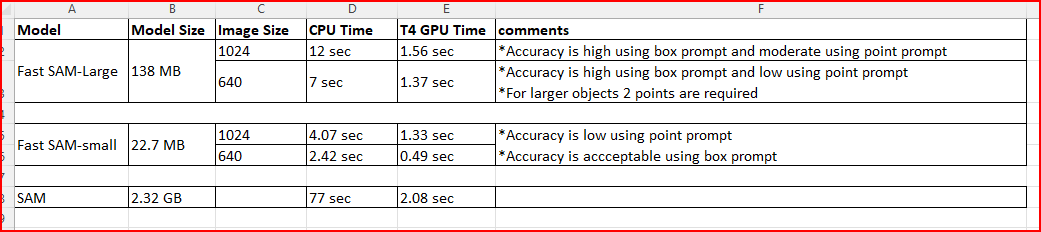

In [3]:
from ultralytics import FastSAM
from ultralytics.models.fastsam import FastSAMPrompt
import time
# Define image path and inference device

DEVICE =  "cuda"

# Create a FastSAM model
model = FastSAM('FastSAM.pt')  # or FastSAM-x.pt

100%|██████████| 138M/138M [00:00<00:00, 163MB/s]


In [28]:
import cv2
from google.colab.patches import cv2_imshow
def draw_bounding_box(image, bbox, color=(0, 255, 0), thickness=1):
    bbox = [int(i) for i in bbox]
    x, y, w, h = bbox
    cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)


image 1/1 /content/images/F_1132.jpg: 576x1024 32 objects, 158.7ms
Speed: 16.5ms preprocess, 158.7ms inference, 13.3ms postprocess per image at shape (1, 3, 576, 1024)


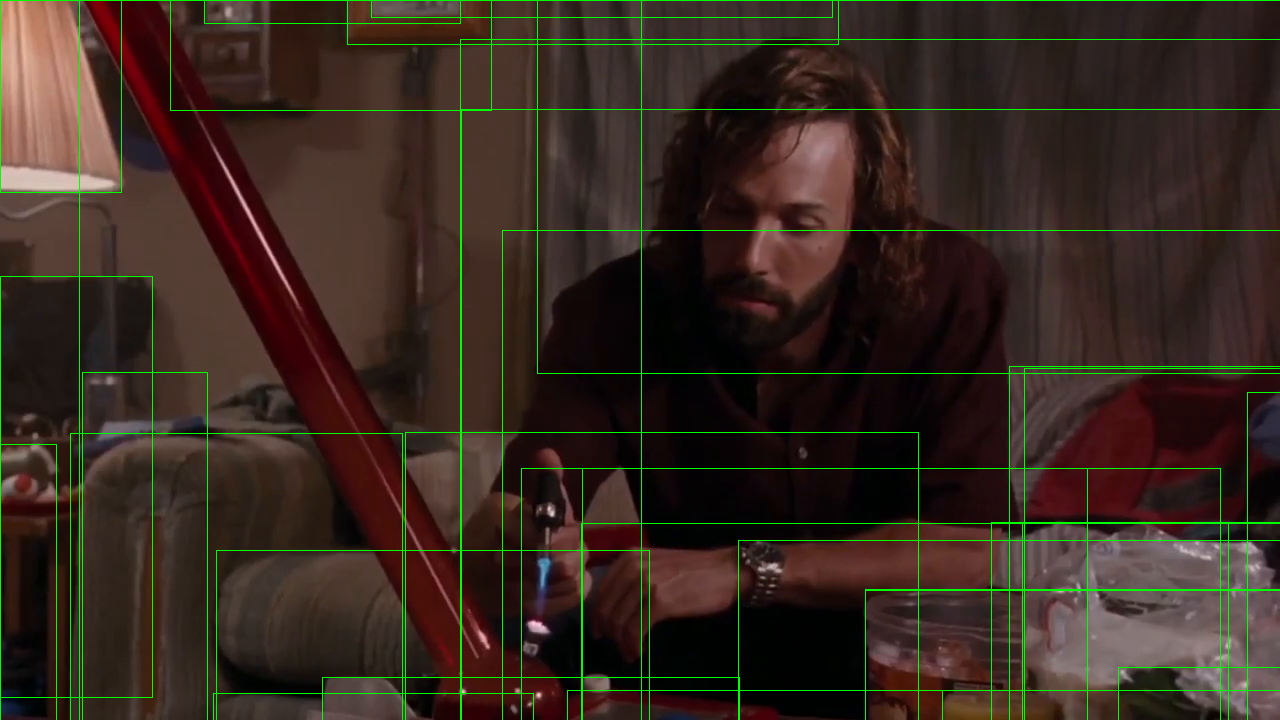

[[70.430908203125, 433.86468505859375, 332.6968078613281, 720.0], [738.0853271484375, 540.2704467773438, 785.2993774414062, 608.261474609375], [216.7196502685547, 550.1666259765625, 433.4320068359375, 720.0], [991.3380126953125, 522.1317138671875, 1105.5908203125, 591.6890869140625], [79.18016052246094, 0.0, 562.4209594726562, 720.0], [347.13983154296875, 0.0, 491.012939453125, 44.097679138183594], [1024.9298095703125, 368.03033447265625, 1280.0, 532.783935546875], [865.252685546875, 590.1514282226562, 1022.733154296875, 720.0], [942.519775390625, 690.70263671875, 1055.6517333984375, 720.0], [82.32164001464844, 372.1031188964844, 125.38175964355469, 439.65606689453125], [0.0, 0.0, 121.55642700195312, 192.92129516601562], [1009.474365234375, 366.69287109375, 1137.5413818359375, 513.5693969726562], [405.43695068359375, 432.7357482910156, 513.5564575195312, 542.5762939453125], [460.43072509765625, 39.42008972167969, 1014.962890625, 720.0], [1022.9295654296875, 523.9334106445312, 1280.0, 7

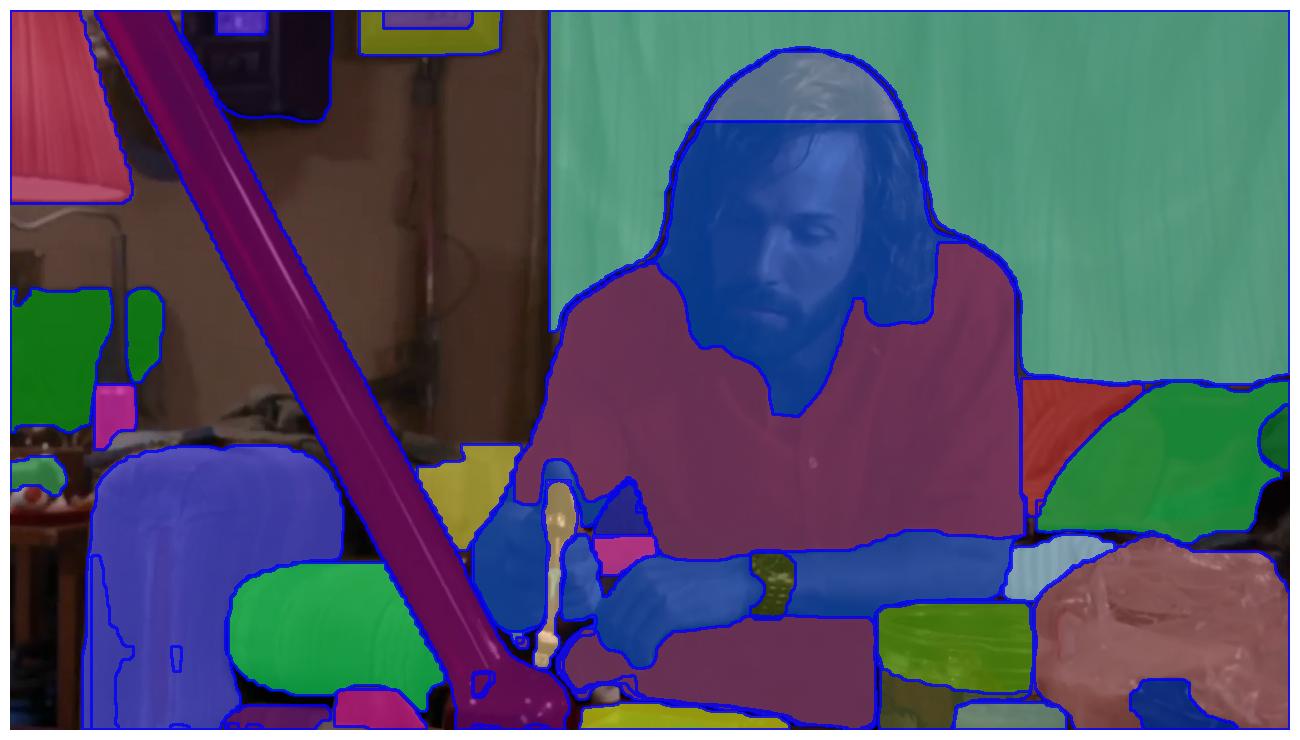

In [34]:
# Run inference on an image

IMAGE_PATH = 'images/F_1132.jpg'
image = cv2.imread(IMAGE_PATH)
st = time.time()
everything_results = model(IMAGE_PATH,
                           device=DEVICE,
                           retina_masks=True,
                           imgsz=1024,
                           conf=0.5,
                           iou=0.9)
bboxes_gpu = everything_results[0].boxes.data
bboxes = bboxes_gpu.cpu().tolist()
final_boxes = []
for i in bboxes:
  final_boxes.append(i[:4])
  draw_bounding_box(image, i[:4])
cv2_imshow(image)
print(final_boxes)
prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)
# # Everything prompt
ann = prompt_process.everything_prompt()
# # Bbox default shape [0,0,0,0] -> [x1,y1,x2,y2]
# ann = prompt_process.box_prompt(bbox=[342, 280, 616, 347])


# # # Point prompt
# # # points default [[0,0]] [[x1,y1],[x2,y2]]
# # # point_label default [0] [1,0] 0:background, 1:foreground
# #ann = prompt_process.point_prompt(points=[[740, 61], [1040, 29]], pointlabel=[1,0])

# # Text prompt
# # ann = prompt_process.text_prompt(text='brown gun')

prompt_process.plot(annotations=ann, output='output')
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')